<a href="https://colab.research.google.com/github/Jean-Rd/Algoritms_Intro_machineLearningWithPython/blob/master/Hands%201NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import tensorflow as tf
from tensorflow import keras

In [45]:
import numpy as np
import random

np.random.seed(seed=1234)
random.seed(1234)

In [46]:
tf.__version__, keras.__version__

('2.4.1', '2.4.0')

In [47]:
fashion_mnist = keras.datasets.fashion_mnist # requests

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [48]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [49]:
X_valid.shape, X_train.shape

((5000, 28, 28), (55000, 28, 28))

In [50]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [51]:
class_names[y_train[4]]

'Ankle boot'

In [52]:
# Agregamos capa uno por uno
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation=keras.activations.elu))
model.add(keras.layers.Dense(100, activation='elu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [53]:
# Agregamos capa todos por una lista
model = keras.models.Sequential([
                                 keras.layers.Flatten(input_shape=[28,28]),
                                 keras.layers.Dense(300, activation=keras.activations.relu),
                                 keras.layers.Dense(100, activation='relu'),
                                 keras.layers.Dense(10, activation=keras.activations.softmax)
])

In [54]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_17 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_18 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.layers[0].name, model.layers

('flatten_3',
  <tensorflow.python.keras.layers.core.Dense at 0x7fca171d85d0>])

In [56]:
weights, biases = model.layers[1].get_weights()

print(weights.shape)
weights

(784, 300)


array([[-0.00711914,  0.05377352, -0.02200727, ...,  0.056945  ,
         0.07398418,  0.02946316],
       [ 0.052118  ,  0.06026495,  0.03480479, ...,  0.00305016,
         0.03878607, -0.03722744],
       [-0.06899307,  0.05630402,  0.05084886, ...,  0.02722024,
         0.06648786, -0.0081066 ],
       ...,
       [-0.01173346, -0.05766837, -0.00950987, ..., -0.07401414,
        -0.00233613, -0.05308045],
       [-0.04450596,  0.0136692 , -0.03640012, ...,  0.05634725,
         0.01066439,  0.01226677],
       [ 0.05338036,  0.00435401,  0.0728444 , ..., -0.00448255,
        -0.05063435, -0.02978471]], dtype=float32)

In [57]:
print(biases.shape)
biases

(300,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [58]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])

In [59]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.9875 - sparse_categorical_accuracy: 0.6829 - val_loss: 0.5523 - val_sparse_categorical_accuracy: 0.7964
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4988 - sparse_categorical_accuracy: 0.8275 - val_loss: 0.4473 - val_sparse_categorical_accuracy: 0.8470
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4525 - sparse_categorical_accuracy: 0.8415 - val_loss: 0.4172 - val_sparse_categorical_accuracy: 0.8590
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4234 - sparse_categorical_accuracy: 0.8514 - val_loss: 0.4087 - val_sparse_categorical_accuracy: 0.8616
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4030 - sparse_categorical_accuracy: 0.8599 - val_loss: 0.3755 - val_sparse_categorical_accuracy: 0.8700
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3842 - spars

In [60]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

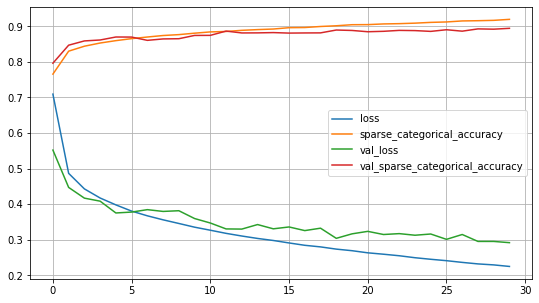

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(9,5))
plt.grid()
plt.show()

In [62]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 56.7757 - sparse_categorical_accuracy: 0.8627


[56.77571105957031, 0.8626999855041504]

In [63]:
val = X_test[:3]

y_pred = model.predict(val)

y_pred

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [64]:
import numpy as np

np.array(model.predict_classes(val))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1])

In [65]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

dta = fetch_california_housing()

X_train, X_, y_train, y_ = train_test_split(dta.data, dta.target, train_size=0.7)
X_test, X_val, y_test, y_val = train_test_split(X_, y_, test_size=0.5)

In [66]:
scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [67]:
X_train.shape, X_test.shape, X_val.shape

#y_train.shape, y_test.shape, y_val.shape

((14447, 8), (3096, 8), (3097, 8))

In [68]:
reg_model = keras.models.Sequential([keras.layers.Dense(30, activation=keras.activations.relu, input_shape=X_train.shape[1:]),
                                     keras.layers.Dense(1)])

reg_model.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.SGD(nesterov=True), metrics=[keras.metrics.mean_squared_error])
history = reg_model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))


Epoch 1/20
452/452 [==============================] - 1s 2ms/step - loss: 1.5501 - mean_squared_error: 1.5501 - val_loss: 0.5177 - val_mean_squared_error: 0.5177
Epoch 2/20
452/452 [==============================] - 1s 1ms/step - loss: 0.6855 - mean_squared_error: 0.6855 - val_loss: 0.4505 - val_mean_squared_error: 0.4505
Epoch 3/20
452/452 [==============================] - 1s 1ms/step - loss: 0.4372 - mean_squared_error: 0.4372 - val_loss: 0.4118 - val_mean_squared_error: 0.4118
Epoch 4/20
452/452 [==============================] - 1s 1ms/step - loss: 0.4073 - mean_squared_error: 0.4073 - val_loss: 0.3930 - val_mean_squared_error: 0.3930
Epoch 5/20
452/452 [==============================] - 1s 1ms/step - loss: 0.3829 - mean_squared_error: 0.3829 - val_loss: 0.3846 - val_mean_squared_error: 0.3846
Epoch 6/20
452/452 [==============================] - 1s 1ms/step - loss: 0.3742 - mean_squared_error: 0.3742 - val_loss: 0.3741 - val_mean_squared_error: 0.3741
Epoch 7/20
452/452 [========

In [69]:
_input = keras.layers.Input(shape=X_train.shape[1:])
hidden_1 = keras.layers.Dense(30, activation=keras.activations.elu)(_input)
hidden_2 = keras.layers.Dense(30, activation=keras.activations.relu)(hidden_1)

concat = keras.layers.Concatenate()([_input, hidden_2])
output = keras.layers.Dense(1)(concat)

model = keras.Model(inputs=[_input], outputs=[output])

In [70]:
Ainput = keras.layers.Input(shape=[5], name='wide input')
Binput = keras.layers.Input(shape=[6], name='deep input')

hidden_1 = keras.layers.Dense(30, activation=keras.activations.elu)(Binput)
hidden_2 = keras.layers.Dense(30, activation=keras.activations.relu)(hidden_1)

concat = keras.layers.concatenate([Ainput, hidden_2])
output = keras.layers.Dense(1, name='output')(concat)

model = keras.Model(inputs=[Ainput, Binput], outputs=output)

In [71]:
# Esto evita el overfitting es como una regularizacion
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001), loss=keras.losses.mean_squared_error, metrics=[keras.metrics.mean_squared_error])

X_trainA, X_trainB = X_train[:, :5], X_train[:, 2:]
X_testA, X_testB = X_test[:, :5], X_test[:, 2:]
X_valA, X_valB = X_val[:,:5], X_val[:,2:]

X_newA, X_newB = X_testA[:3], X_testB[:3]

history = model.fit((X_trainA, X_trainB), y_train, epochs=20, validation_data=((X_valA, X_valB), y_val))

Epoch 1/20
452/452 [==============================] - 1s 2ms/step - loss: 2.8455 - mean_squared_error: 2.8455 - val_loss: 0.9249 - val_mean_squared_error: 0.9249
Epoch 2/20
452/452 [==============================] - 1s 2ms/step - loss: 0.7707 - mean_squared_error: 0.7707 - val_loss: 0.6838 - val_mean_squared_error: 0.6838
Epoch 3/20
452/452 [==============================] - 1s 2ms/step - loss: 0.6461 - mean_squared_error: 0.6461 - val_loss: 0.6080 - val_mean_squared_error: 0.6080
Epoch 4/20
452/452 [==============================] - 1s 2ms/step - loss: 0.5779 - mean_squared_error: 0.5779 - val_loss: 0.5639 - val_mean_squared_error: 0.5639
Epoch 5/20
452/452 [==============================] - 1s 2ms/step - loss: 0.5751 - mean_squared_error: 0.5751 - val_loss: 0.5296 - val_mean_squared_error: 0.5296
Epoch 6/20
452/452 [==============================] - 1s 2ms/step - loss: 0.5166 - mean_squared_error: 0.5166 - val_loss: 0.5090 - val_mean_squared_error: 0.5090
Epoch 7/20
452/452 [========

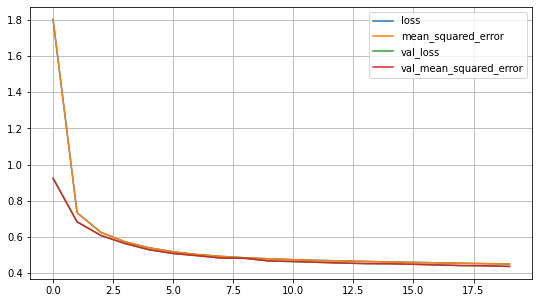

In [72]:
pd.DataFrame(history.history).plot(figsize=(9,5))
plt.grid()
plt.show()

In [73]:
pd.DataFrame(history.history)['loss']

0     1.802342
1     0.734032
2     0.625087
3     0.573607
4     0.540503
5     0.518454
6     0.503336
7     0.493018
8     0.485136
9     0.479639
10    0.474864
11    0.470867
12    0.467968
13    0.465112
14    0.462327
15    0.459952
16    0.457531
17    0.455053
18    0.452843
19    0.450793
Name: loss, dtype: float64

In [74]:
mse_test = model.evaluate((X_testA, X_testB), y_test)

97/97 [==============================] - 0s 1ms/step - loss: 0.4646 - mean_squared_error: 0.4646


In [75]:
y_pred = model.predict((X_newA, X_newB))

In [76]:
y_pred

array([[1.7209833],
       [2.211931 ],
       [1.4349761]], dtype=float32)

In [77]:
y_test[:3]

array([1.607, 2.47 , 0.973])

In [78]:
# NN con output auxiliar
output = keras.layers.Dense(1, name='main_output')(concat)
aux_output = keras.layers.Dense(1, name='aux_output')(hidden_2)

model = keras.Model(inputs=[Ainput, Binput], outputs=[output, aux_output])

In [79]:
model.compile(loss=[keras.losses.mean_squared_error, keras.losses.mean_squared_error],
              loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD())

In [80]:
history = model.fit([X_trainA, X_trainB], [y_train, y_train], epochs=20, validation_data=([X_valA, X_valB], [y_val, y_val]))

Epoch 1/20
452/452 [==============================] - 2s 2ms/step - loss: 1.0226 - main_output_loss: 0.8316 - aux_output_loss: 2.7420 - val_loss: 0.4991 - val_main_output_loss: 0.4504 - val_aux_output_loss: 0.9382
Epoch 2/20
452/452 [==============================] - 1s 2ms/step - loss: 0.5268 - main_output_loss: 0.4811 - aux_output_loss: 0.9382 - val_loss: 0.4715 - val_main_output_loss: 0.4358 - val_aux_output_loss: 0.7933
Epoch 3/20
452/452 [==============================] - 1s 2ms/step - loss: 0.4950 - main_output_loss: 0.4612 - aux_output_loss: 0.7990 - val_loss: 0.4642 - val_main_output_loss: 0.4365 - val_aux_output_loss: 0.7133
Epoch 4/20
452/452 [==============================] - 1s 2ms/step - loss: 0.4693 - main_output_loss: 0.4414 - aux_output_loss: 0.7206 - val_loss: 0.4622 - val_main_output_loss: 0.4391 - val_aux_output_loss: 0.6702
Epoch 5/20
452/452 [==============================] - 1s 2ms/step - loss: 0.4792 - main_output_loss: 0.4565 - aux_output_loss: 0.6834 - val_loss

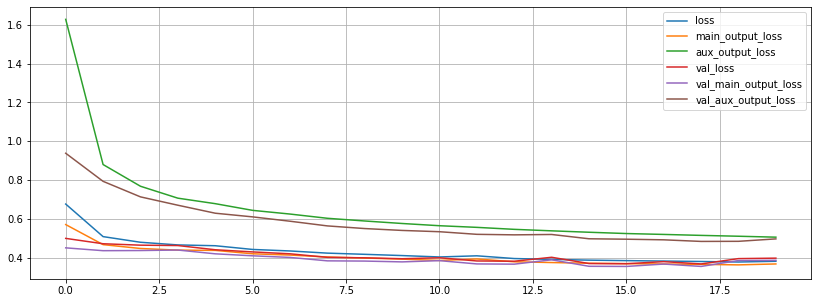

In [81]:
pd.DataFrame(history.history).plot(figsize=(14,5))
plt.grid()
plt.show()

In [82]:
total_loss, main_loss, aux_loss = model.evaluate([X_testA, X_testB], [y_test, y_test])

97/97 [==============================] - 0s 1ms/step - loss: 0.4119 - main_output_loss: 0.3978 - aux_output_loss: 0.5383


In [83]:
total_loss, main_loss, aux_loss

(0.41186392307281494, 0.39781808853149414, 0.538277268409729)

In [84]:
y_pred, Y_pred_aux = model.predict([X_newA, X_newB])

In [85]:
y_pred

array([[1.5279294],
       [2.2736862],
       [1.1756003]], dtype=float32)

In [86]:
Y_pred_aux

array([[1.7043626],
       [3.1567645],
       [1.4809799]], dtype=float32)

In [87]:
y_test[:3]

array([1.607, 2.47 , 0.973])

In [92]:
class WideandDeepModel(keras.Model):

  def __init__(self, units=30, activation='relu', **kwargs):

    super().__init__(**kwargs)
    self.hidden_1 = keras.layers.Dense(units, activation=activation)
    self.hidden_2 = keras.layers.Dense(units, activation=activation)

    self.main_output = keras.layers.Dense(1)
    self.aux_output = keras.layers.Dense(1)

  
  def call(self, inputs):

    input_A, input_B = inputs # inputs de seguro es una lista
    hidden_1 = self.hidden_1(input_B)
    hidden_2 = self.hidden_2(hidden_1)
    
    concat = keras.layers.concatenate([input_A, hidden_2])

    main_output = self.main_output(concat)
    aux_output = self.aux_output(hidden_2)
    
    return main_output, aux_output

In [93]:
model = WideandDeepModel()

In [96]:
model.call([X_trainA, X_trainB])

(<tf.Tensor: shape=(14447, 1), dtype=float32, numpy=
 array([[-0.73713183],
        [-0.15783377],
        [-0.37998736],
        ...,
        [ 0.09591891],
        [ 0.47920147],
        [ 0.10413171]], dtype=float32)>,
 <tf.Tensor: shape=(14447, 1), dtype=float32, numpy=
 array([[-0.06269458],
        [-0.0955326 ],
        [ 0.13616627],
        ...,
        [ 0.15033893],
        [-0.2447474 ],
        [-0.05144714]], dtype=float32)>)

<bound method Model.summary of <__main__.WideandDeepModel object at 0x7fca11c064d0>>